## MNIST Data Classification

#### Import Libraries

In [1]:
import keras
import numpy as np
from keras import layers

In [2]:
import joblib

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Data Loading

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

#### Data Scaling

In [6]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### Data Visualization

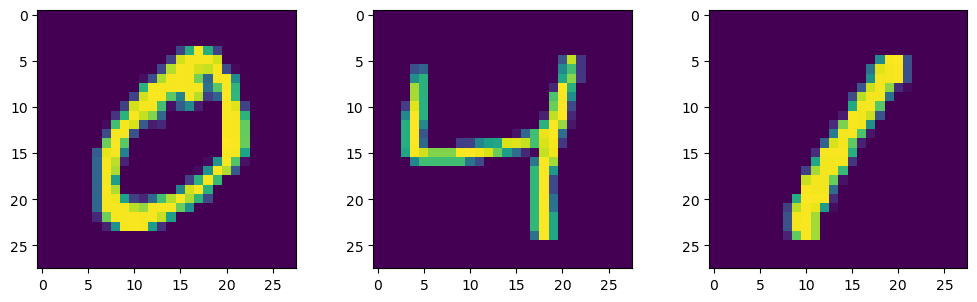

In [8]:
import matplotlib.pyplot as plt
plt.subplots(1, 3, figsize = (3*4, 4))
plt.subplots_adjust(wspace=0.3)

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(X_train[i+1])
    
plt.show()

#### Model Parameters

In [9]:
num_classes = 10 # i.e [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
input_shape = (28, 28, 1)

#### Dimension Expansion

In [10]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [11]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Converting Class Vectors to Binary Class Matrices

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

#### Model Building

In [14]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

#### Model Training

In [15]:
batch_size = 128
epochs = 15

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.7540 - loss: 0.7850 - val_accuracy: 0.9798 - val_loss: 0.0773
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9647 - loss: 0.1145 - val_accuracy: 0.9845 - val_loss: 0.0562
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9733 - loss: 0.0875 - val_accuracy: 0.9880 - val_loss: 0.0445
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9771 - loss: 0.0708 - val_accuracy: 0.9877 - val_loss: 0.0409
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9819 - loss: 0.0605 - val_accuracy: 0.9895 - val_loss: 0.0391
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9835 - loss: 0.0526 - val_accuracy: 0.9885 - val_loss: 0.0389
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9836 - loss: 0.0505 - val_accuracy: 0.9912 - val_loss: 0.0322
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9858 - loss: 0.0444 - 

#### Model Evaluation

In [16]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss: ', loss)
print('Test Accuracy: ', accuracy)

Test Loss:  0.02140900492668152
Test Accuracy:  0.9926999807357788


#### Model Prediction

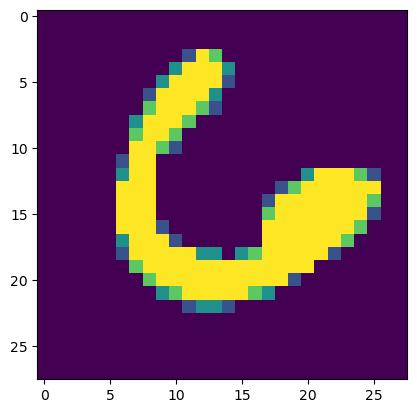

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
The predicted digit is:  6


In [17]:
plt.imshow(X_test[737])
plt.show()
y_pred = model.predict(X_test)

L = list(y_pred[737])
print('The predicted digit is: ', L.index(max(L)))

In [18]:
y_test[737]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

#### Model Saving

In [ ]:
data_to_save = {'model':model, 'X_test':X_test}

In [ ]:
joblib.dump(data_to_save, 'model_data.joblib')